In [1]:
import Pkg
Pkg.add(["Images", "TestImages", "Plots"])

using TestImages, Images, LinearAlgebra, Plots

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
 Resolving package versions...
  Updating `~/.julia/environments/v1.2/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.2/Manifest.toml`
 [no changes]


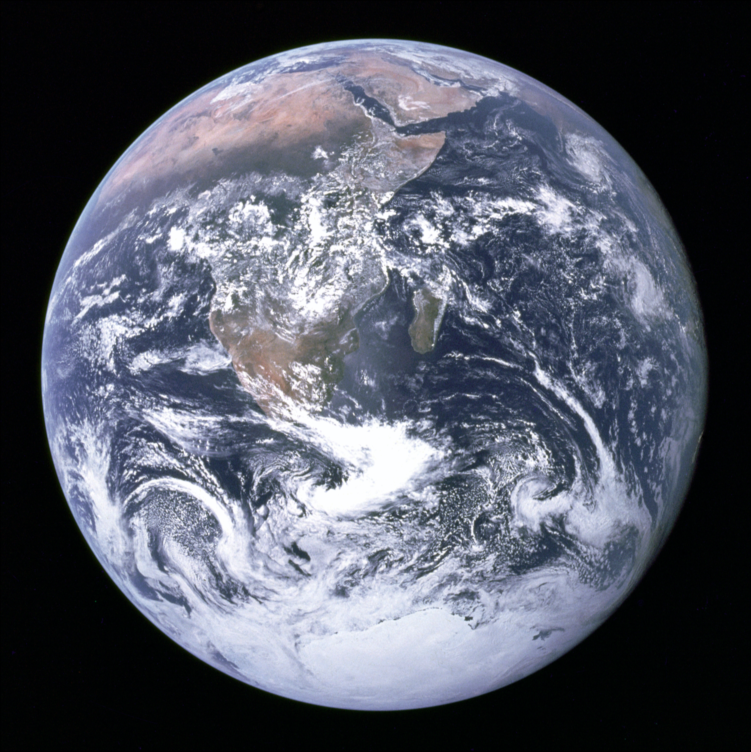

In [2]:
img = testimage("earth_apollo17")

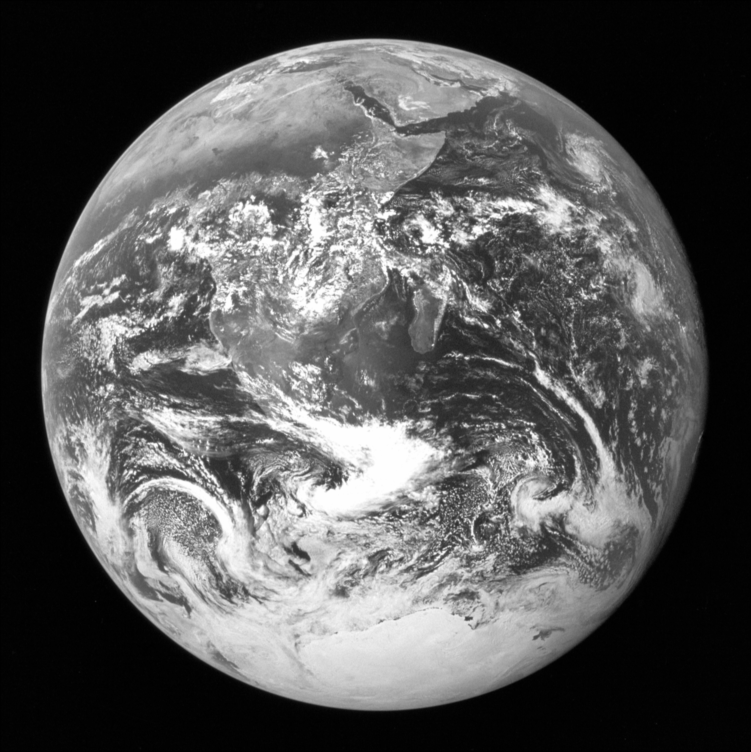

In [3]:
gray_img = float(Gray.(img))

In [4]:
F = svd(gray_img)

┌ Warning: one(Gray{Float32}) will soon switch to returning 1; you might need to switch to `oneunit`
│   caller = eigtype at eigen.jl:204 [inlined]
└ @ Core /Users/sabae/buildbot/worker/package_macos64/build/usr/share/julia/stdlib/v1.2/LinearAlgebra/src/eigen.jl:204


SVD{Float32,Float32,Array{Float32,2}}(Float32[-0.00037825108 0.0003016349 … -0.0033130809 0.002042307; -0.00036990643 0.00029209256 … -0.009144926 0.008094606; … ; -0.00033612954 0.00039847067 … 0.015820624 0.017449018; -0.00035265982 0.0004441054 … -0.010948921 0.0064137415], Float32[1281.9158, 329.1734, 213.12727, 177.85648, 133.42079, 121.83251, 105.235565, 94.96248, 87.57774, 78.67157  …  0.0008644283, 0.0007422131, 0.0007126275, 0.0005424459, 0.00048449464, 0.0004204874, 0.0002700683, 0.00022103271, 0.00017807826, 5.0438575e-5], Float32[-0.0003470113 -0.00033307076 … -0.00031349994 -0.00033626283; -3.8226415e-5 -2.3508444e-5 … -9.6970405e-5 -8.748266e-5; … ; 0.0 0.0031412106 … 0.014523937 0.009528872; 0.0 -0.0021507337 … 0.012041698 0.010753856])

In [5]:
function rank_approx(F::SVD, k)
    U, S, V = F
    M = U[:, 1:k] * Diagonal(S[1:k]) * V[:, 1:k]'
    # All values coerced to be between 0.0 and 1.0.
    M = min.(max.(M, 0.0), 1.)
    Gray.(M)
end

rank_approx (generic function with 1 method)

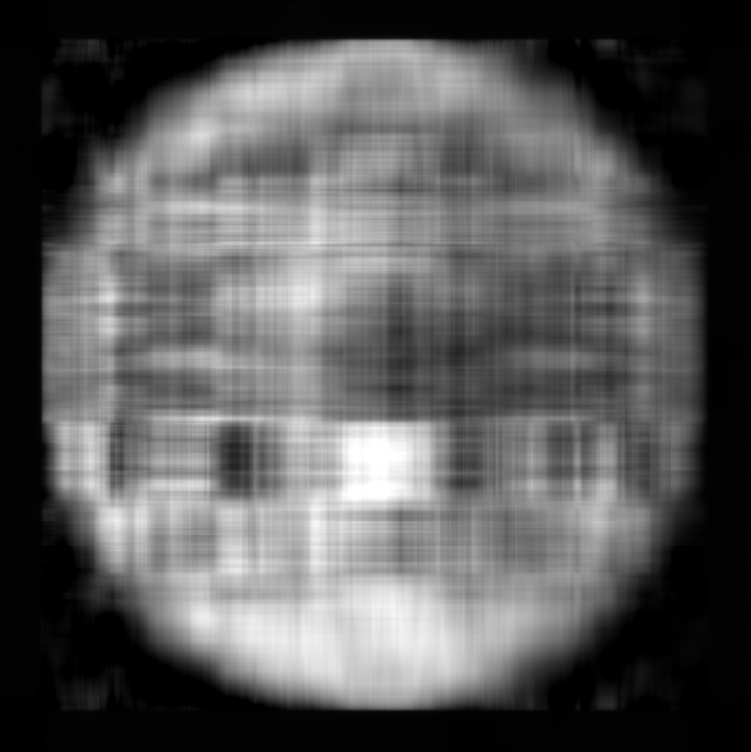

In [6]:
rank_approx(F, 5)

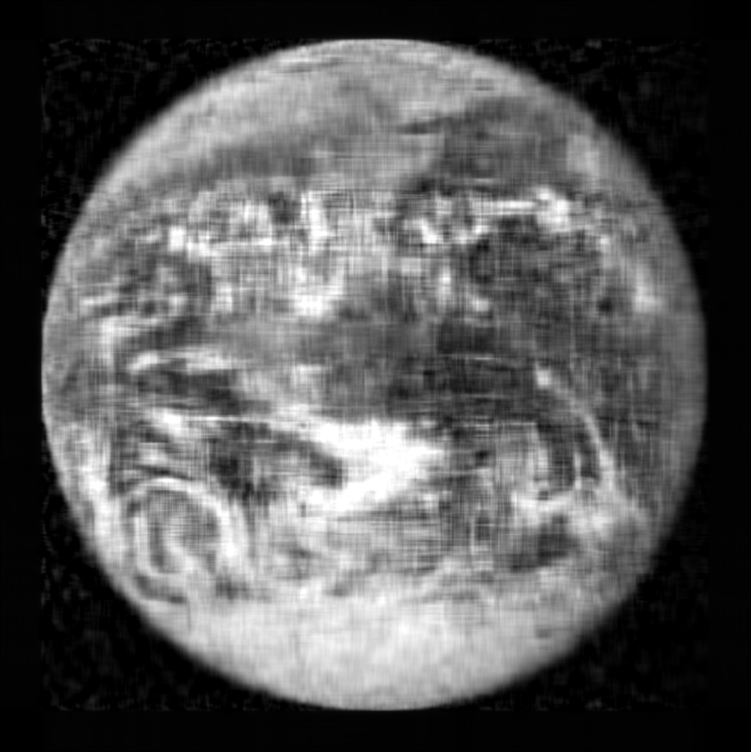

In [7]:
rank_approx(F, 20)

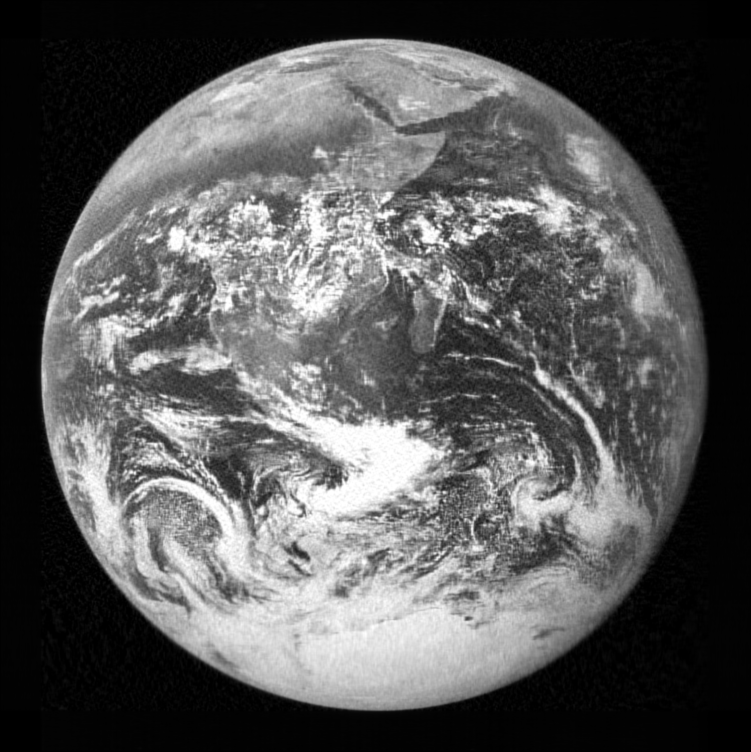

In [8]:
rank_approx(F, 100)

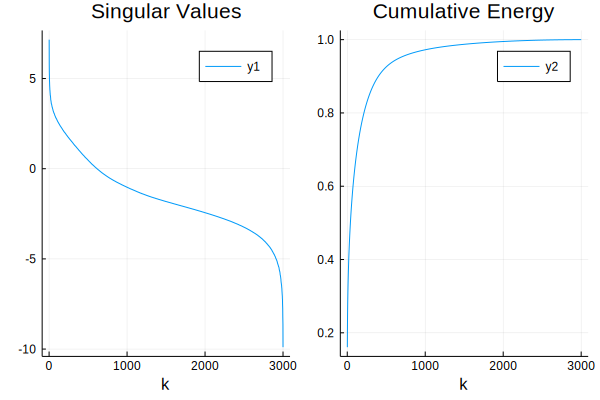

In [11]:
plot([log.(F.S) cumsum(F.S) / sum(F.S)], layout=2, title=["Singular Values" "Cumulative Energy"], xlabel="k")